This notebook shows the performance of prysm for pupil construction, choosing to analyze the Fringe Zernike polynomials and Seidel notation. 

In [57]:
from timeit import default_timer as timer

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker

from prysm import FringeZernike
from prysm.coordinates import cart_to_polar

plt.style.use('ggplot')
%matplotlib inline

In [51]:
samples = 128
x, y = np.linspace(-1,1,samples), np.linspace(-1,1,samples)
rho, phi = cart_to_polar(y, x)  # just optics convention to do angles w.r.t. y.

def time_fringezernike_pupil(nterms, samples):
    coefs = np.random.rand(nterms)
    t0 = timer()
    FringeZernike(coefs, samples=samples)
    t1 = timer()
    return (t1 - t0) * 1e3

def multirun(function, times, *args):
    if times == 1:
        return function(*args)
    else:
        out = []
        for time in range(times):
            out.append(function(*args))
        return out

def mean(iterable):
    try:
        return sum(iterable) / len(iterable)
    except TypeError:
        return iterable

In [46]:
ntrials = 1
arr_sizes = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8096]
nterms = list(range(48))
times = {}
for size in arr_sizes:
    times[size] = {}
    for n in nterms:
        times[size][n] = multirun(time_fringezernike_pupil, ntrials, n, size)

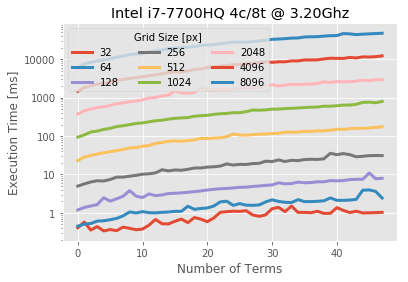

In [60]:
fig, ax = plt.subplots()
for size in arr_sizes:
    terms = []
    speed = []
    for nterms, timings in times[size].items():
        terms.append(nterms)
        speed.append(mean(timings))
    
    ax.plot(terms, speed, lw=3, label=size)  # skip 0 term cases
ax.legend(title='Grid Size [px]', ncol=3)
ax.set(xlabel='Number of Terms', ylabel='Execution Time [ms]', yscale='log', title='Intel i7-7700HQ 4c/8t @ 3.20Ghz');
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

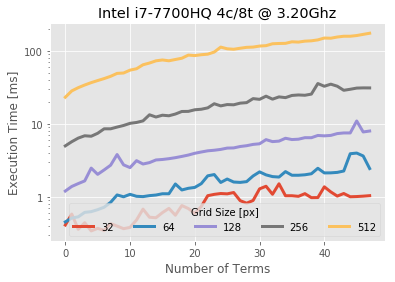

In [62]:
fig, ax = plt.subplots()
for size in arr_sizes:
    if size > 512:
        continue
    terms = []
    speed = []
    for nterms, timings in times[size].items():
        terms.append(nterms)
        speed.append(mean(timings))
    
    ax.plot(terms, speed, lw=3, label=size)  # skip 0 term cases
ax.legend(title='Grid Size [px]', ncol=5)
ax.set(xlabel='Number of Terms', ylabel='Execution Time [ms]', yscale='log', title='Intel i7-7700HQ 4c/8t @ 3.20Ghz');
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

The x=0 line shows the time overhead or time constant of the FringeZernike class as a function of grid size.  Note that this overhead includes the time to convert the OPD array (reals) to a phase array (complex) and apply the pupil mask.  It can be seen that for the common 128x128 grid size, the overhead is approximately 1ms.